<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-vallesda/blob/main/A01191310_TecMty_Regresion_lineal_polinomial_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
### Dra. María de la Paz Rico Fernández
### Dr. Juan Miguel Meza Méndez

### **David Valles A01191310**`

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [70]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

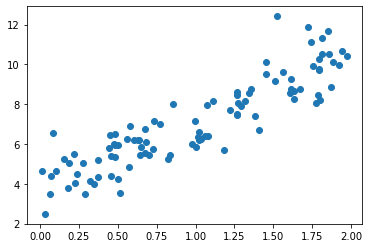

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

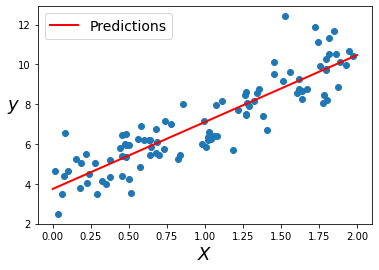

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [23]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

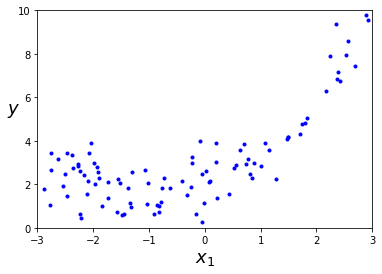

In [24]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [25]:
import pandas as pd
pd.DataFrame(y)

,0
0,6.772755
1,0.640017
2,2.135981
3,4.319231
4,1.842375
...,...
95,0.744091
96,3.334690
97,3.441915
98,2.050856


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [27]:
X_poly

array([[ 2.42495217e+00,  5.88039301e+00],
       [-9.10467198e-01,  8.28950518e-01],
       [ 8.39369350e-02,  7.04540905e-03],
       [ 1.70191808e+00,  2.89652514e+00],
       [-6.20743306e-01,  3.85322252e-01],
       [ 7.32520201e-01,  5.36585845e-01],
       [ 2.17418225e+00,  4.72706847e+00],
       [ 2.69712374e+00,  7.27447648e+00],
       [-2.11755911e+00,  4.48405660e+00],
       [ 2.55952575e+00,  6.55117207e+00],
       [-4.73022415e-02,  2.23750205e-03],
       [-1.45053367e+00,  2.10404793e+00],
       [-2.45185463e-01,  6.01159111e-02],
       [ 2.88019545e+00,  8.29552584e+00],
       [-4.42914360e-02,  1.96173131e-03],
       [-1.02749034e+00,  1.05573640e+00],
       [ 8.00405126e-01,  6.40648366e-01],
       [-1.55912629e+00,  2.43087478e+00],
       [-2.54482003e+00,  6.47610899e+00],
       [-2.22672167e+00,  4.95828939e+00],
       [-2.23172497e+00,  4.98059632e+00],
       [-2.08858384e+00,  4.36218245e+00],
       [-2.16703696e+00,  4.69604920e+00],
       [ 8.

`X_poly` now contains the original feature of X plus the square of the feature:

In [28]:
print(X[0])
print(X[0]*X[0])


[2.42495217]
[5.88039301]


In [29]:
X_poly[0]

array([2.42495217, 5.88039301])

Fit the model to this extended training data:

In [30]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.03780025, 0.49597826]]), array([1.94702036]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

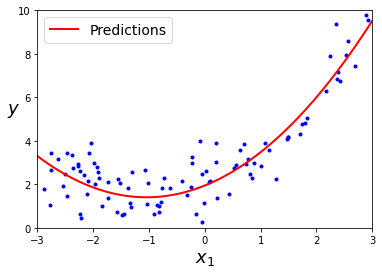

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [163]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
988,7.701899,31.926163
692,5.110869,39.037419
25,1.831097,36.085800
365,4.036878,37.876625
139,3.056005,42.487260
458,4.302063,38.896746
109,2.866500,57.942993
661,5.032730,39.631188
449,4.277074,28.927687
952,6.794418,32.801259


In [164]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [165]:
len(X)

1000

In [166]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

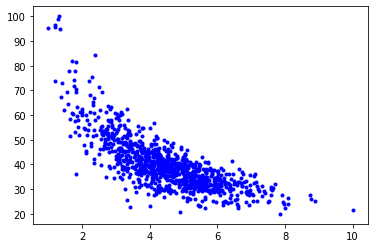

In [167]:
plt.plot(X,y,'b.')

Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)
Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [168]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


In [170]:
def linear_model():
  modelos = list()
  nombres = list()

  # LR - Regresión Lineal:
  modelos.append(LinearRegression())
  nombres.append('LR')
  
  return modelos, nombres

In [171]:
def models():
  modelos = list()
  nombres = list()

  # LR - Regresión Poli:
  modelos.append(LinearRegression())
  nombres.append('LR-Poli')

  # Lasso:
  modelos.append(Lasso())
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(Ridge())
  nombres.append('RIDGE')
  
  return modelos, nombres

In [172]:
def print_errors(y, y_pred):
  print('Error medio Absoluto (MAE):', mean_absolute_error(y, y_pred))
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, y_pred)))
  print('r2_score',r2_score(y, y_pred))

In [173]:
def get_errors(y, pred):
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  return mae, r2

In [174]:
def print_eq(model_name, pipeline):
    print('Nombre de modelo: ', model_name)
    print('Ecuacion: ', pipeline['model'].coef_, pipeline['model'].intercept_)

In [179]:
def plot_model(X, yreal, yhat, nombre):
  plt.scatter(X, np.ravel(yreal), marker='^', label='real')  
  plt.scatter(X, np.ravel(yhat), marker='_', label=nombre)  
  plt.legend(loc=2)
  plt.show()

Nombre de modelo:  LR
Ecuacion:  [-7.95601572] 40.044068093688885
Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


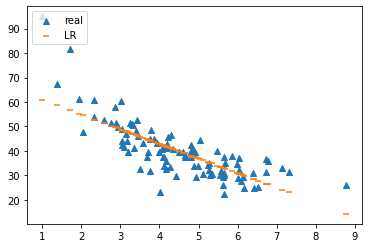

______


In [180]:
#lineal
# X_train, X_test, y_train, y_test 

modelos, nombres = linear_model()
scaler = StandardScaler()
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('scaler', scaler),('model',modelos[i])])

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  print_eq(nombres[i], pipeline)
  print_errors(y_test, y_pred)

  mae, r2 = get_errors(y_test, y_pred)
  plot_model(X_test, y_test, y_pred, nombres[i])
  print('______')

Nombre de modelo:  LR-Poli
Ecuacion:  [-21.79549108  14.15649894] 40.04406809368894
Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068425
r2_score 0.7385501224942536


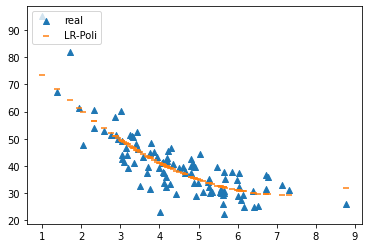

______
Nombre de modelo:  LASSO
Ecuacion:  [-6.95601572 -0.        ] 40.044068093688914
Error medio Absoluto (MAE): 5.118448320379438
Root Mean Squared Error: 7.269157584660993
r2_score 0.5939245693227484


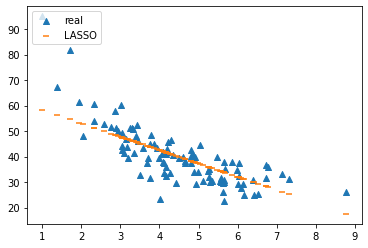

______
Nombre de modelo:  RIDGE
Ecuacion:  [-20.9436098   13.30890719] 40.04406809368894
Error medio Absoluto (MAE): 4.381394607773364
Root Mean Squared Error: 5.871678810541038
r2_score 0.7350504855491644


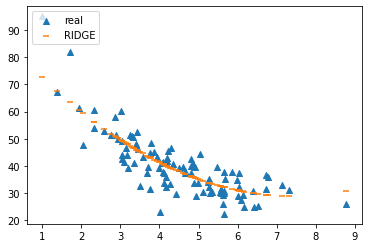

______


In [182]:
#polinomial
modelos, nombres = models()
scaler = StandardScaler()
resultados = list()   

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('scaler', scaler),('model',modelos[i])])

  pipeline.fit(X_poly, y_train)
  y_pred = pipeline.predict(X_poly_test)

  print_eq(nombres[i], pipeline)
  print_errors(y_test, y_pred)

  mae, r2 = get_errors(y_test, y_pred)
  plot_model(X_test, y_test, y_pred, nombres[i])
  print('______')

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [196]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3625,2223089048,20140625T000000,356000.0,4,2.00,2020,48693,1.5,0,0,...,7,2020,0,1949,0,98045,47.4646,-121.759,1610,34900
10955,3630110510,20140804T000000,571000.0,3,2.50,1920,3867,2.0,0,0,...,8,1920,0,2005,0,98029,47.5538,-121.994,2190,3841
15393,7708000010,20141107T000000,421000.0,3,2.00,1420,12655,1.0,0,0,...,7,1420,0,1968,0,98056,47.5309,-122.186,2020,9655
10175,5101402276,20141217T000000,495000.0,4,1.75,1930,6720,1.0,0,2,...,8,1130,800,1959,0,98115,47.6935,-122.312,1850,6380
12528,985000833,20140910T000000,209977.0,3,1.00,1170,6134,1.0,0,0,...,7,1170,0,1948,0,98168,47.4941,-122.312,1440,9823
19739,4019500030,20141029T000000,450000.0,3,2.50,2280,4557,2.0,0,0,...,8,2280,0,2010,0,98028,47.7733,-122.266,2070,4610
2786,7631200292,20140626T000000,669000.0,2,1.75,1950,10766,1.0,0,3,...,6,1160,790,1952,0,98166,47.4504,-122.377,1780,11721
17735,3959401645,20140604T000000,355000.0,2,1.75,1650,4000,1.0,0,0,...,7,950,700,1947,0,98108,47.5622,-122.319,1060,4110
19624,3026059204,20140530T000000,825500.0,3,2.50,2780,11964,2.0,0,0,...,9,2780,0,2009,0,98034,47.7127,-122.216,1760,9640
19311,1442300035,20140702T000000,355000.0,3,1.75,1730,7416,1.5,0,0,...,7,1730,0,1954,0,98133,47.7600,-122.349,1390,6490


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [198]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [199]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

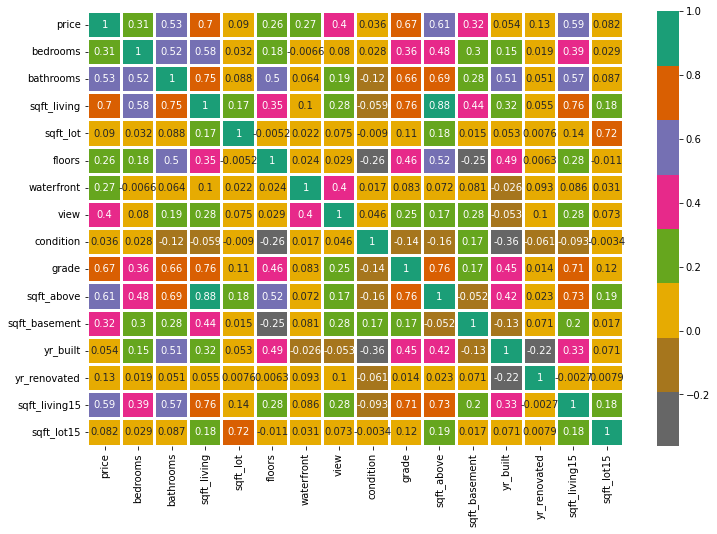

In [200]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [201]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Ejercicio 2. Regresión múltiple.

Encuentra el mejor regresor para los datos de las casas:

Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
Regresión Múltiple Lineal.

Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

Regresión Múltiple Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)
Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
Agrega las conclusiones

In [207]:
#lineal
modelos, nombres = linear_model()
scaler = StandardScaler()
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('scaler', scaler),('model',modelos[i])])

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  print_eq(nombres[i], pipeline)
  print_errors(y_test, y_pred)

  mae, r2 = get_errors(y_test, y_pred)
  print('______')

Nombre de modelo:  LR
Ecuacion:  [[ -35668.70284466   31880.11003687   74278.73211217     709.02976685
    17063.91938752   48347.72152378   31665.30347596   13814.98526045
   140605.41191444   61706.89220533   38643.72527878 -104165.37949974
     5346.30295863   19878.29179843  -14985.43540617]] [539150.73672305]
Error medio Absoluto (MAE): 137480.1388273265
Root Mean Squared Error: 232133.36762406898
r2_score 0.6579723205007988
______


In [206]:
modelos, nombres = models()
scaler = StandardScaler()
resultados = list()   

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('scaler', scaler),('model',modelos[i])])

  pipeline.fit(X_poly, y_train)
  y_pred = pipeline.predict(X_poly_test)

  print_eq(nombres[i], pipeline)
  print_errors(y_test, y_pred)
  print('______')

Nombre de modelo:  LR-Poli
Ecuacion:  [[ 8.71970180e+05 -8.39965237e+05  4.64458401e+14 -1.15283856e+06
  -1.11677256e+06 -4.13512721e+14 -2.21569680e+05  3.63464576e+05
   1.29203367e+06 -4.18411892e+14 -2.24628541e+14 -2.52236610e+06
  -1.19090151e+06  2.74065582e+06 -9.29881336e+05  9.83098419e+03
   3.17458321e+04  1.70169105e+15 -2.71559500e+03  2.12644332e+04
  -3.45963941e+03 -8.63845125e+02 -2.11606828e+04 -5.04506137e+04
  -1.45092571e+15 -6.55028924e+14 -8.64588722e+05 -1.33787802e+04
   6.30019050e+04  2.06226444e+04 -3.55369852e+04 -1.91176133e+15
  -1.52664004e+04 -5.37342656e+04  1.07264062e+04  8.19028125e+03
  -3.01477539e+03  1.82890875e+05  1.63452280e+15  6.20461268e+14
   7.77577156e+05 -1.70916875e+04 -5.09010000e+04 -4.39598438e+03
  -5.93080259e+14 -4.12822624e+14  3.43329634e+15 -9.04292960e+15
   1.59161579e+16  5.24950572e+15 -2.77391227e+15  1.16773103e+15
   3.10539585e+16  1.45153707e+15  2.31068479e+16  3.11859539e+15
  -1.27569262e+15  9.39475000e+03  3.0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.305e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


# Ejercicio 3 - K means

In [208]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 19.2 MB/s 
     |████████████████████████████████| 1.0 MB 56.9 MB/s 
     |████████████████████████████████| 1.7 MB 61.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 69.9 MB/s 
     |████████████████████████████████| 6.3 MB 62.8 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=a93e808c8ec710b7dff980df0b2bac44d2d43d78570fd39c9872c86a6ed6040f
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=76d02acffcd766647a924da0f32aa521204c03d627e56c232ac421d4c3e0689a
  Stored in directory: /root/

In [209]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [210]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [211]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [212]:
latlong=df[["latitude","longitude"]]

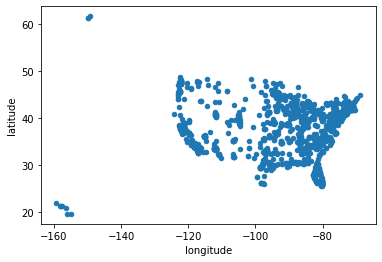

In [213]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [214]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [215]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [216]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [217]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [218]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [219]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

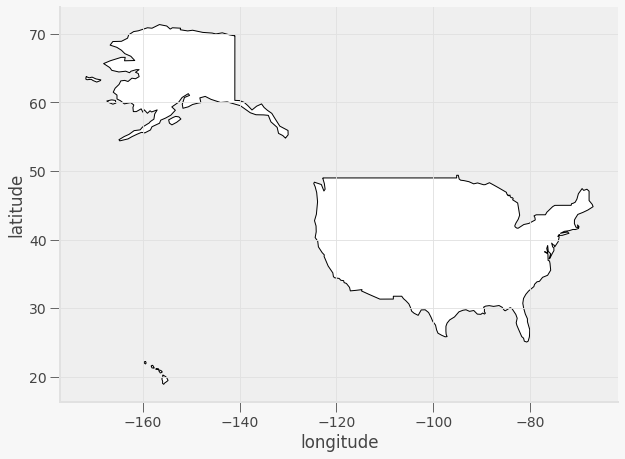

In [220]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

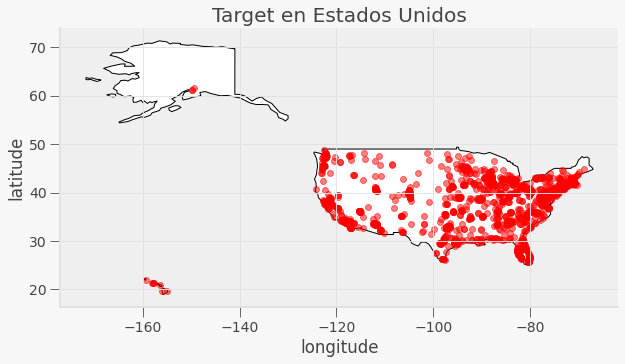

In [221]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()